# Session On Ensemble Methods

# Contents

1. Introduction to Ensemble Learning
  * What
  * Why
2. Bias Variance Tradeoff
3. Decision Trees
  * What
  * Splitting Criteria
  * Decision Tree Calculation
4. Types of Ensemble Learning
  * Bagging
  * Boosting
5. Data Preprocessing
  * Class Imbalance
  * Histograms & Scatterplots
  * Correlation
  * Splitting & Scaling
  * Missing Values
6. Model Training
7. Evaluation
8. Difference Between Bagging and Random Forest
9. AdaBoost
10. Gradient Boosting
11. XGBoost

   


# Introduction to Ensemble Learning

---

### What is Ensemble Learning?
- Ensemble learning is a machine learning technique that combines multiple models (classifiers or regressors) to solve a particular problem and improve the model's performance.
  
---

### Why Use Ensemble Learning?
- **Improved Accuracy**: Aggregating predictions from multiple models typically leads to better generalization and reduced overfitting.
- **Robustness**: A diverse set of models can reduce the risk of relying on a single, potentially weak model.
- **Error Reduction**: Ensemble methods minimize errors by compensating for the weaknesses of individual models.

<p float="left">
  <img src="https://machinelearningmastery.com/wp-content/uploads/2020/07/Example-of-Combining-Decision-Boundaries-Using-an-Ensemble.png" width="500" />
  <img src="https://machinelearningmastery.com/wp-content/uploads/2020/07/Example-of-Combining-Hyperplanes-Using-an-Ensemble.png" width="500" />
</p>  


# Bias Variance Tradeoff

### What is Bias-Variance?
- **Bias**: Error due to overly simplistic models that do not capture the underlying patterns in data (underfitting).
- **Variance**: Error due to overly complex models that capture noise in the data (overfitting).

---

### The Tradeoff
- **High Bias**: Leads to underfitting, where the model is too simple and misses relevant patterns.
- **High Variance**: Leads to overfitting, where the model is too complex and captures noise.
- **Goal**: Find the optimal balance between bias and variance to minimize **overall error**.

---

### Visualization
- **Low Bias + Low Variance = Ideal Model**


<img src="https://www.endtoend.ai/assets/blog/misc/bias-variance-tradeoff-in-reinforcement-learning/underfit_right_overfit.png" />



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# install decision tree visualization library
!pip install dtreeviz

In [ ]:
import warnings
import logging

# suppress general warnings
warnings.filterwarnings("ignore")

# Suppress specific matplotlib warnings
logging.getLogger('matplotlib.font_manager').disabled = True

# Decision Trees

---

### What is a Decision Tree?
- A **Decision Tree** is a supervised learning algorithm used for both classification and regression tasks.
- It models data by splitting it into subsets based on feature values, creating a tree-like structure of decisions.

---

### Splitting Criteria
- The tree splits at each node using metrics like **Gini Index** or **Information Gain** for classification, and **Mean Squared Error (MSE)** for regression.

#### **1. Information Gain (Entropy)**
- Entropy:
  $$
  H(S) = - \sum_{i=1}^{n} p_i \log_2(p_i)
  $$
  Where $p_i$ is the proportion of class $i$ in dataset $S$.
  
- Information Gain:
  $$
  IG(S, A) = H(S) - \sum_{v \in \text{Values}(A)} \frac{|S_v|}{|S|} H(S_v)
  $$
  Where $S_v$ is the subset of $S$ for which feature $A$ has value $v$.

#### **2. Gini Index**
- Gini Impurity:
  $$
  G(S) = 1 - \sum_{i=1}^{n} p_i^2
  $$
  Where $p_i$ is the proportion of class $i$.

---

### Example
- If we split a node based on the feature with the highest **Information Gain** or lowest **Gini Index**, we create a structure where each path represents a decision rule.




In [ ]:
decision_tree_data = {
    "Outlook": ['sunny', 'sunny', 'overcast', 'rain', 'rain', 'rain', 'overcast', 'sunny', 'sunny', 'rain', 'sunny', 'overcast', 'overcast', 'rain'],
    "Temperature": ['hot', 'hot', 'hot', 'mild', 'cool', 'cool', 'mild', 'cool', 'mild', 'mild', 'mild', 'hot', 'mild', 'mild'],
    "Humidity": ['high', 'high', 'high', 'high', 'normal', 'normal', 'normal', 'high', 'normal', 'normal', 'high', 'normal', 'normal', 'high'],
    "Windy": [False, True, False, False, False, True, True, False, False, False, True, True, False, True],
    "Play?": ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

In [ ]:
df = pd.DataFrame(decision_tree_data)
df[:]

,Outlook,Temperature,Humidity,Windy,Play?
0,sunny,hot,high,False,No
1,sunny,hot,high,True,No
2,overcast,hot,high,False,Yes
3,rain,mild,high,False,Yes
4,rain,cool,normal,False,Yes
5,rain,cool,normal,True,No
6,overcast,mild,normal,True,Yes
7,sunny,cool,high,False,No
8,sunny,mild,normal,False,Yes
9,rain,mild,normal,False,Yes


## Decision Tree Root Node Split Calculation

### Dataset
- **Features**: Outlook, Temperature, Humidity, Windy
- **Target**: Play? (Yes or No)
---

### Step 1: Entropy of the Entire Dataset (S)
We begin by calculating the entropy for the target feature **Play?**:

- **Yes**: 9 occurrences
- **No**: 5 occurrences

The entropy \(H(S)\) is calculated as:
$$
H(S) = -p_{yes} \log_2(p_{yes}) - p_{no} \log_2(p_{no})
$$

So,
$$
H(S) = -\frac{9}{14} \log_2\left(\frac{9}{14}\right) - \frac{5}{14} \log_2\left(\frac{5}{14}\right)
$$
$$
H(S) = 0.940
$$

---

### Step 2: Splitting on "Outlook" Feature
The possible values for "Outlook" are **sunny**, **overcast**, and **rain**.

#### Outlook = Sunny
- **Yes**: 2 occurrences
- **No**: 3 occurrences
- Subset entropy:
$$
H(sunny) = -\frac{2}{5} \log_2\left(\frac{2}{5}\right) - \frac{3}{5} \log_2\left(\frac{3}{5}\right) = 0.971
$$

#### Outlook = Overcast
- **Yes**: 4 occurrences
- **No**: 0 occurrences
- Subset entropy:
$$
H(overcast) = -\frac{4}{4} \log_2\left(\frac{4}{4}\right) = 0.0
$$

#### Outlook = Rain
- **Yes**: 3 occurrences
- **No**: 2 occurrences
- Subset entropy:
$$
H(rain) = -\frac{3}{5} \log_2\left(\frac{3}{5}\right) - \frac{2}{5} \log_2\left(\frac{2}{5}\right) = 0.971
$$

---

### Step 3: Information Gain for "Outlook"
The weighted entropy for the "Outlook" split is calculated as:

$$
H(S|Outlook) = \frac{5}{14} \cdot H(sunny) + \frac{4}{14} \cdot H(overcast) + \frac{5}{14} \cdot H(rain)
$$

Substitute the entropies:
$$
H(S|Outlook) = \frac{5}{14} \cdot 0.971 + \frac{4}{14} \cdot 0.0 + \frac{5}{14} \cdot 0.971
$$
$$
H(S|Outlook) = 0.693
$$

The **Information Gain** for the "Outlook" feature is:
$$
IG(S, Outlook) = H(S) - H(S|Outlook)
$$
$$
IG(S, Outlook) = 0.940 - 0.693 = 0.247
$$

---

### Conclusion
- The **Information Gain** for splitting on the **Outlook** feature is **0.247**.
- We would compare this with the Information Gain of other features to determine the best feature for the root node split.


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

import dtreeviz
from IPython.display import display_svg, SVG, Image

In [ ]:
# Create a LabelEncoder
le = LabelEncoder()

# Fit and transform the target variable
df['Play?'] = le.fit_transform(df['Play?'])

# Convert categorical features to numerical using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Outlook', 'Temperature', 'Humidity', 'Windy'])

In [ ]:
# Separate features (X) and target variable (y)
X = df_encoded.drop('Play?', axis=1)
y = df_encoded['Play?']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
# Create a Decision Tree classifier
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)

# Train the classifier
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

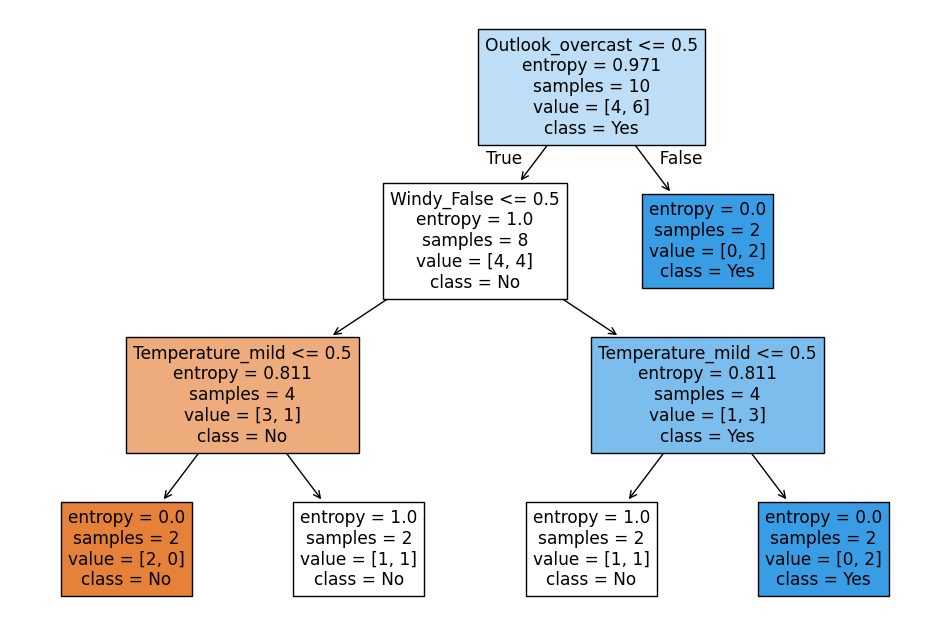

In [ ]:
# Visualize the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()

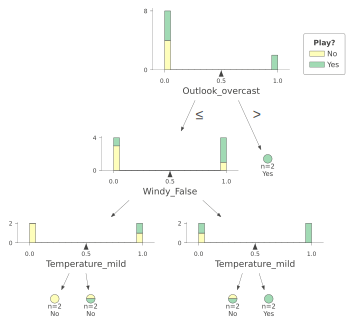

In [ ]:
# Visualize using dtreeviz
viz_model  = dtreeviz.model(clf, X_train, y_train, target_name='Play?', feature_names=X_train.columns.tolist(), class_names=['No', 'Yes'])
viz_model.view()

# Types of Ensemble Learning

---

### 1. Bagging (Bootstrap Aggregating)
- **Bagging** involves training multiple models in parallel on different subsets of the data and averaging their predictions to reduce variance and prevent overfitting. Example: Random Forest.

---

### 2. Boosting
- **Boosting** is a sequential technique where each model corrects the errors of the previous one, focusing on hard-to-classify examples, to improve overall accuracy. Example: AdaBoost, Gradient Boosting.


<img src="https://images.datacamp.com/image/upload/v1700592126/image1_fcace6f2b3.png" />

# Difference Between Bagging and Boosting

### Key Differences

| Aspect              | **Bagging**                              | **Boosting**                             |
|---------------------|------------------------------------------|------------------------------------------|
| **Training Method**  | Parallel (independent models)           | Sequential (dependent models)            |
| **Focus**            | Reduces variance                         | Reduces both bias and variance           |
| **Model Complexity** | Simpler models (weak learners)          | Can combine complex models               |
| **Weight Adjustment**| All samples are treated equally          | Misclassified samples are weighted more  |
| **Performance**      | Effective for reducing overfitting      | Effective for improving accuracy          |
| **Sensitivity**      | Less sensitive to noise                  | More sensitive to noise and outliers     |

In [ ]:
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, balanced_accuracy_score
import plotly.express as px

In [ ]:
breast_cancer_data='https://raw.githubusercontent.com/aryamanan/mydata/refs/heads/main/breast-cancer.csv'

In [ ]:
df=pd.read_csv(breast_cancer_data)

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
# I do it this way so it occupies less space on screen, nothing complex
dtype_dict = {col: dtype for col, dtype in zip(df.columns, df.dtypes)}
print(dtype_dict)

{'id': dtype('int64'), 'diagnosis': dtype('O'), 'radius_mean': dtype('float64'), 'texture_mean': dtype('float64'), 'perimeter_mean': dtype('float64'), 'area_mean': dtype('float64'), 'smoothness_mean': dtype('float64'), 'compactness_mean': dtype('float64'), 'concavity_mean': dtype('float64'), 'concave points_mean': dtype('float64'), 'symmetry_mean': dtype('float64'), 'fractal_dimension_mean': dtype('float64'), 'radius_se': dtype('float64'), 'texture_se': dtype('float64'), 'perimeter_se': dtype('float64'), 'area_se': dtype('float64'), 'smoothness_se': dtype('float64'), 'compactness_se': dtype('float64'), 'concavity_se': dtype('float64'), 'concave points_se': dtype('float64'), 'symmetry_se': dtype('float64'), 'fractal_dimension_se': dtype('float64'), 'radius_worst': dtype('float64'), 'texture_worst': dtype('float64'), 'perimeter_worst': dtype('float64'), 'area_worst': dtype('float64'), 'smoothness_worst': dtype('float64'), 'compactness_worst': dtype('float64'), 'concavity_worst': dtype('f

# Data Preprocessing

### Checking for class imbalance (and why it is important)

- Class imbalance occurs when one class has significantly more instances than the other. In the breast cancer dataset, this means there might be a lot more benign samples than malignant ones.

- Class imbalance can lead to biased models that perform poorly on the minority class (which is often the class of interest, like malignant tumors). The model might become good at predicting the majority class but fail to identify the important minority class.


In [ ]:
# checking for class imbalance
px.histogram(data_frame=df, x='diagnosis', color='diagnosis')
# M: Malignant -> Blue
# B: Benign -> Red

### Histograms
Help visualize the distribution of a single feature. You can observe the frequency of different values and identify potential patterns or outliers. By using color to represent the diagnosis (Malignant or Benign), you can see how the distribution of the feature varies for each class. This can help in identifying features that are good at separating the two classes.

### Scatterplots
Used to visualize the relationship between two features. This can help identify correlations or potential interactions between features. Similar to histograms, you can use color to represent the diagnosis and see if there are any patterns or groupings based on the two features plotted.

In [ ]:
px.histogram(data_frame=df,x='radius_mean',color='diagnosis')

In [ ]:
px.histogram(data_frame=df,x='perimeter_mean',color='diagnosis')

In [ ]:
px.histogram(data_frame=df,x='smoothness_mean',color='diagnosis')

In [ ]:
px.histogram(data_frame=df,x='texture_mean',color='diagnosis')

In [ ]:
px.scatter(data_frame=df,x='concavity_worst',color='diagnosis')

In [ ]:
px.scatter(data_frame=df,x='fractal_dimension_worst',color='diagnosis')

In [ ]:
df.drop('id', axis=1, inplace=True)

In [ ]:
df['diagnosis'] = (df['diagnosis'] == 'M').astype(int) #encode the label into 1/0

In [ ]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678



#### Get highly correlated features with the target. We'll use Pearson Correlation for Feature Selection

- Correlation is a statistical measure that describes the strength and direction of the relationship between two or more variables. It tells you how much two things tend to change together.
- Features that have a high correlation (either positive or negative) with the target variable are likely to be informative for predicting the target. These features are good candidates for inclusion in the model.
- Features that are highly correlated with each other often carry redundant information
- For example: In breast cancer prediction, tumor size might be strongly correlated with the diagnosis (malignant or benign).

In [ ]:
corr = df.corr()

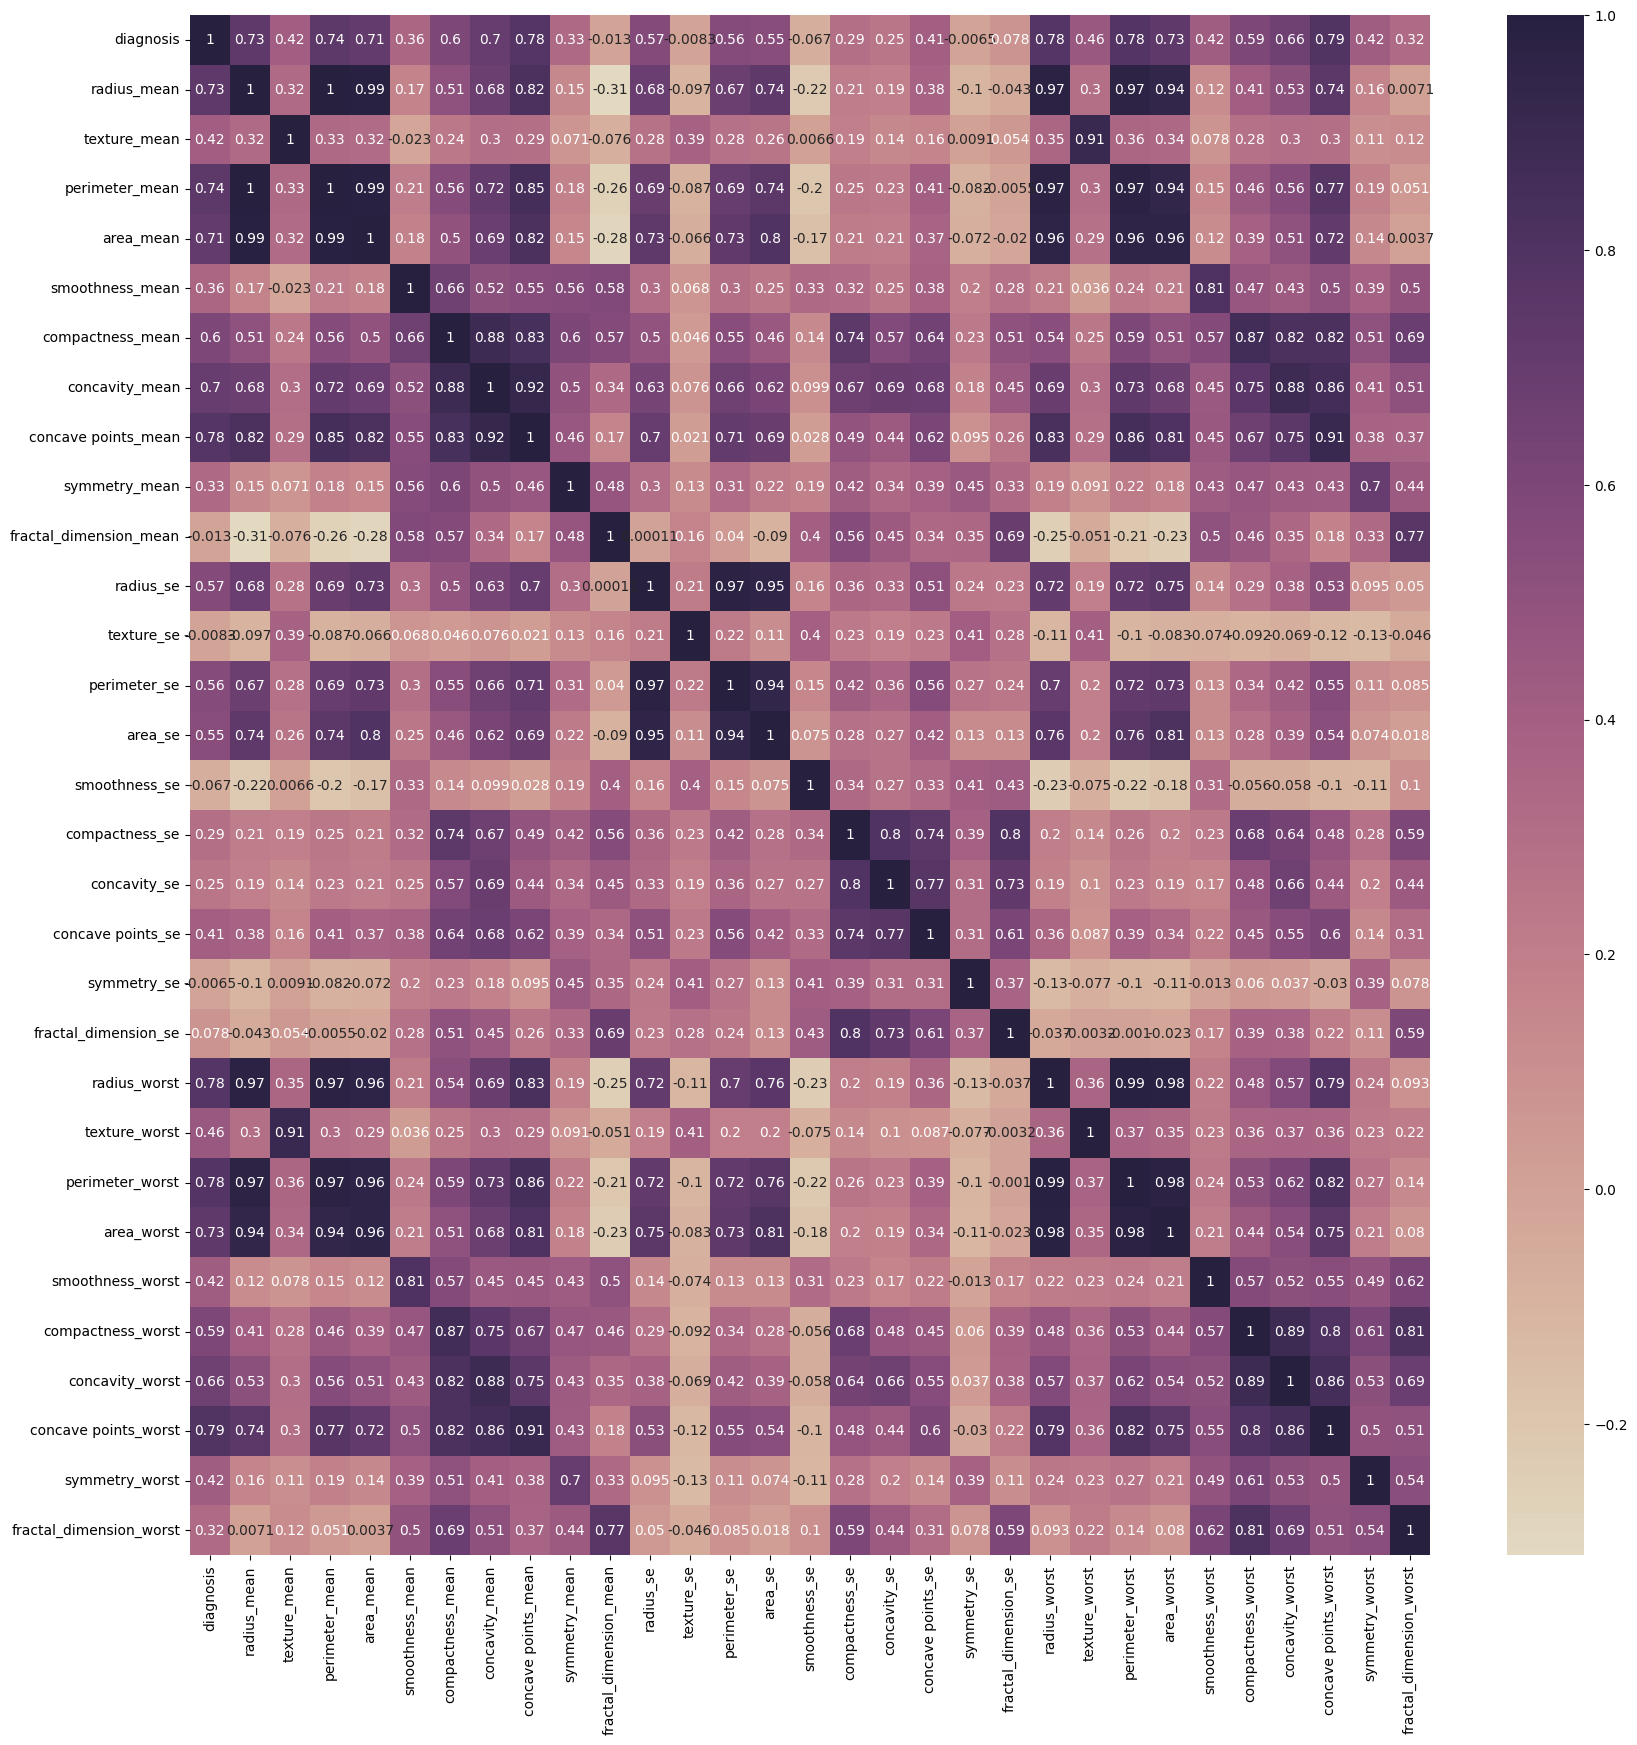

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True),annot=True)
plt.show()

# Get the absolute value of the correlation
cor_target = abs(corr["diagnosis"])

# Select highly correlated features (thresold = 0.2)
relevant_features = cor_target[cor_target>0.2]

# Collect the names of the features
names = [index for index, value in relevant_features.items()]

# Drop the target variable from the results
names.remove('diagnosis')

In [ ]:
# define data and labels
X = df[names]
y = df['diagnosis']

### Splitting & Scaling
**Splitting**: To create separate training set (for model training) and validation set (for model evaluation on unseen data) out of available data

**Scaling**: It leads to faster convergence rates in gradient descent and improves model performance through providing better accuracy and generalisation, hence building more robust models

In [ ]:
# Split the  data into traing and validating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

scaler.transform(X_train)
scaler.transform(X_test)

array([[-0.46649743, -0.13728933, -0.44421138, ..., -0.19435087,
         0.17275669,  0.20372995],
       [ 1.36536344,  0.49866473,  1.30551088, ...,  0.99177862,
        -0.561211  , -1.00838949],
       [ 0.38006578,  0.06921974,  0.40410139, ...,  0.57035018,
        -0.10783139, -0.20629287],
       ...,
       [-0.73547237, -0.99852603, -0.74138839, ..., -0.27741059,
        -0.3820785 , -0.32408328],
       [ 0.02898271,  2.0334026 ,  0.0274851 , ..., -0.49027026,
        -1.60905688, -0.33137507],
       [ 1.87216885,  2.80077153,  1.80354992, ...,  0.7925579 ,
        -0.05868885, -0.09467243]])

In [ ]:
# Check for missing values
print(df.isnull().sum())

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


### Missing Values (and why it's important to impute them, not remove them)
- Missing values can significantly impact the performance of machine learning models, leading to biased results or reduced accuracy. This dataset didn't have them (which is a great thing)
- Removing rows or columns with missing values can lead to loss of valuable information, especially if the missing data is not random.
- IMPORTANT: Both DecisionTreeClassifier and RandomForestClassifier in scikit-learn do not inherently handle missing values. Attempting to train these models with a dataset containing missing values will result in errors.
- If we were to encounter any missing values in the dataset we would've imputed them through sklearn's SimpleImputer using mean as strategy for each column, you can also use knn for imputing values when model is highly sensitive to a column's values

In [ ]:
from sklearn.impute import SimpleImputer

# Create a SimpleImputer with strategy='mean'
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data
imputer.fit(X_train)

# Transform the training and testing data
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

## Model Training & Evaluation

In [ ]:
def train_evaluate_model(model, X_train, y_train, X_test,y_test):
    '''
    Keyword arguments:
    X -- Training data
    y -- Traing labels

    returns a dataframe for evaluating metrics
    '''

    # Fit the model instance
    model.fit(X_train, y_train)

    # Calculate predictions
    predictions = model.predict(X_test)

    # Compute metrics for evaluation
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    balanced_accuracy = balanced_accuracy_score(y_test, predictions)

    # Create a dataframe to visualize the results
    eval_df = pd.DataFrame([[accuracy, f1, precision, recall, balanced_accuracy]], columns=['accuracy', 'f1_score', 'precision', 'recall', 'balanced_accuracy'])
    return eval_df

### Why F1-score and Recall are More Important Than Accuracy (in Imbalanced Datasets):

- Accuracy can be misleading in imbalanced datasets. A model can achieve high accuracy by simply predicting the majority class most of the time.
- Recall (Sensitivity): Measures the ability of the model to correctly identify all positive instances (e.g., all malignant tumors). It's crucial in medical diagnoses to minimize false negatives (incorrectly predicting a malignant tumor as benign).
- F1-score: Harmonic mean of precision and recall, providing a balanced measure of the model's performance. It considers both false positives and false negatives.



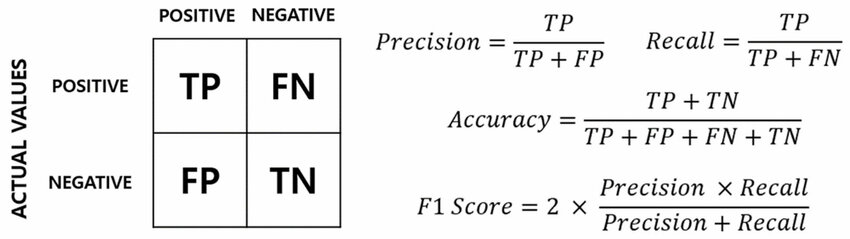

In [ ]:
# Create an empty DataFrame to store and compare the results fore each model
results = pd.DataFrame(columns=['accuracy', 'f1_score', 'precision', 'recall', 'balanced_accuracy'])

In [ ]:
# Decision tree classifier

decision_tree = DecisionTreeClassifier()
decision_tree_results = train_evaluate_model(decision_tree, X_train, y_train, X_test, y_test)

decision_tree_results.index = ['DecisionTree']

results = pd.concat([results,decision_tree_results])

In [ ]:
results.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy
DecisionTree,0.929825,0.909091,0.888889,0.930233,0.929905


# Difference Between Bagging and Random Forest
**Key Difference from Bagging**: In Random Forest, not only is the data randomly sampled, but also the **features are randomly sampled** at each node split, leading to more diverse decision trees.  


| Aspect               | **Bagging**                               | **Random Forest**                         |
|----------------------|-------------------------------------------|-------------------------------------------|
| **Base Learner**      | Can use any model (commonly decision trees) | Always uses decision trees                |
| **Feature Selection** | Uses all features at every split          | Randomly selects a subset of features at each split |
| **Diversity**         | Models are diverse due to different subsets of data | More diversity due to both data and feature randomization |
| **Complexity**        | Simpler, as it doesn't involve feature randomization | Adds complexity with feature selection at each split |


In [ ]:
# Random Forest classifier
rfc = RandomForestClassifier()
rfc_result = train_evaluate_model(rfc, X_train, y_train, X_test, y_test)
rfc_result.index = ['RandomForest']

results = pd.concat([results,rfc_result])

In [ ]:
results.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy
RandomForest,0.964912,0.952381,0.975610,0.930233,0.958074
DecisionTree,0.929825,0.909091,0.888889,0.930233,0.929905


# AdaBoost (Adaptive Boosting)

AdaBoost (Adaptive Boosting) is an ensemble learning technique that combines multiple weak classifiers to create a strong classifier. It focuses on adjusting the weights of misclassified instances so that subsequent classifiers pay more attention to difficult cases.

<img src="https://iq.opengenus.org/content/images/2020/02/0_KYszvMnr3nCtjaGy.png"/>

In [ ]:
# AdaBoost Classifier
adaboost = AdaBoostClassifier()
adaboost_result = train_evaluate_model(adaboost, X_train, y_train, X_test, y_test)
adaboost_result.index = ['AdaBoost']

results = pd.concat([results, adaboost_result])

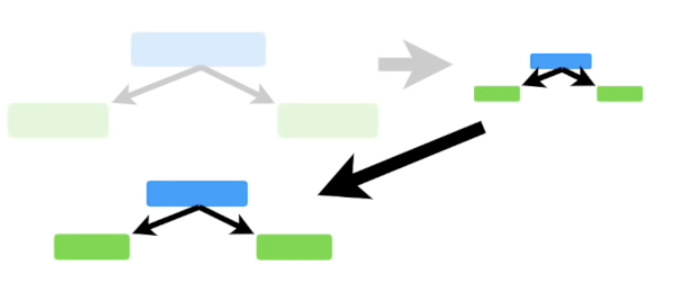

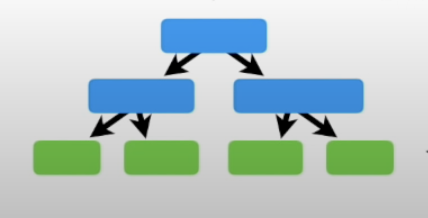

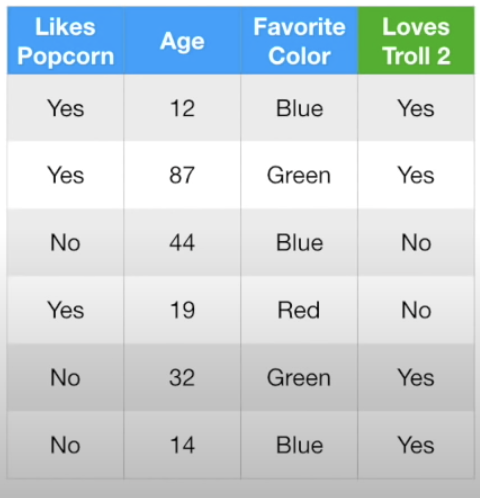

# Gradient Boosting

Gradient Boosting is an ensemble learning technique that builds models in a sequential manner, where each new model attempts to correct the errors of the previous ones. It combines the strengths of decision trees and gradient descent to optimize the loss function.


![](https://miro.medium.com/v2/resize:fit:720/format:webp/1*5n3NX8MxIA8U8DJerol4lQ.png)

In [ ]:
# Gradient Boosting Classifier
gradient_boost = GradientBoostingClassifier()
gradient_boost_result = train_evaluate_model(gradient_boost, X_train, y_train, X_test, y_test)
gradient_boost_result.index = ['Gradient Boost']

results = pd.concat([results, gradient_boost_result])

# XGBoost (Extreme Gradient Boosting)

---

### What is XGBoost?
- **XGBoost** is an optimized gradient boosting framework designed for speed and performance. It is widely used for supervised learning tasks, particularly in classification and regression problems. XGBoost implements a gradient boosting algorithm that improves upon traditional methods by enhancing both execution speed and model performance.

---

### Key Features

1. **Regularization**:
   - XGBoost incorporates both L1 (Lasso) and L2 (Ridge) regularization techniques to control overfitting, making it more robust compared to traditional gradient boosting.

2. **Parallel Processing**:
   - The algorithm efficiently uses multiple CPU cores during the training process, significantly speeding up computation by parallelizing tree construction.

3. **Handling Missing Values**:
   - XGBoost automatically learns how to handle missing values during training, making it easier to work with real-world datasets.

4. **Tree Pruning**:
   - Instead of post-pruning, XGBoost uses a depth-first approach to tree construction, allowing it to prune trees while growing, which results in faster computation and a more efficient model.

5. **Scalability**:
   - Designed to be scalable and distributed, XGBoost can handle large datasets and can be integrated with big data frameworks like Apache Spark.


In [ ]:
# XGBOOST classifier
xgboost = xgb.XGBClassifier()
xgboost_result = train_evaluate_model(xgboost, X_train, y_train, X_test, y_test)
xgboost_result.index = ['XGBoost']

results = pd.concat([results,xgboost_result])

# Comparison

In [ ]:
results.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy
AdaBoost,0.973684,0.964706,0.976190,0.953488,0.969702
RandomForest,0.964912,0.952381,0.975610,0.930233,0.958074
Gradient Boost,0.964912,0.952381,0.975610,0.930233,0.958074
XGBoost,0.956140,0.941176,0.952381,0.930233,0.951032
DecisionTree,0.929825,0.909091,0.888889,0.930233,0.929905


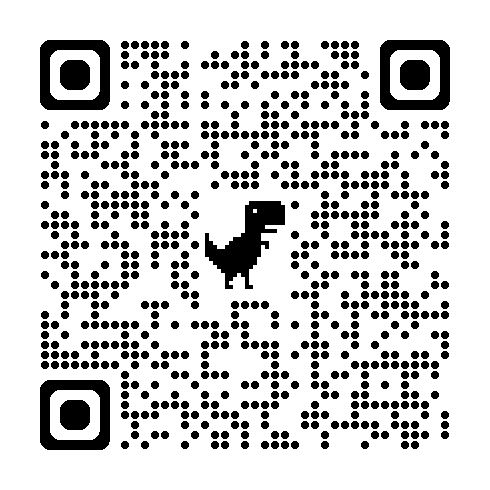